In [80]:
!wget --no-check-certificate \
https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatraining.csv

!wget --no-check-certificate \
https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatest.csv

!wget --no-check-certificate \
https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatest2.csv

--2020-09-20 08:14:41--  https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatraining.csv
Resolving code.datasciencedojo.com (code.datasciencedojo.com)... 167.99.111.153
Connecting to code.datasciencedojo.com (code.datasciencedojo.com)|167.99.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404174 (395K) [text/plain]
Saving to: ‘datatraining.csv.1’

datatraining.csv.1  100%[===================>] 394.70K  1.37MB/s    in 0.3s    

2020-09-20 08:14:42 (1.37 MB/s) - ‘datatraining.csv.1’ saved [404174/404174]

--2020-09-20 08:14:42--  https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Occupancy%20Detection/datatest.csv
Resolving code.datasciencedojo.com (code.datasciencedojo.com)... 167.99.111.153
Connecting to code.datasciencedojo.com (code.datasciencedojo.com)|167.99.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136740 (134K) [text/plain]
Saving to: ‘datatest.c

In [81]:
import pandas as pd 

In [82]:
test = pd.read_csv('/content/datatest.csv')#datatest
val = pd.read_csv('/content/datatest2.csv')#datatest2
train = pd.read_csv('/content/datatraining.csv')#datatraining

In [83]:
print('Shape of the training data is '+str(train.shape))
print('Shape of the validation data is '+str(val.shape))
print('Shape of the test data is '+str(test.shape))

Shape of the training data is (8143, 7)
Shape of the validation data is (9752, 7)
Shape of the test data is (2665, 7)


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [85]:
train.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [86]:
train.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb488567b00>,
      dtype=object)

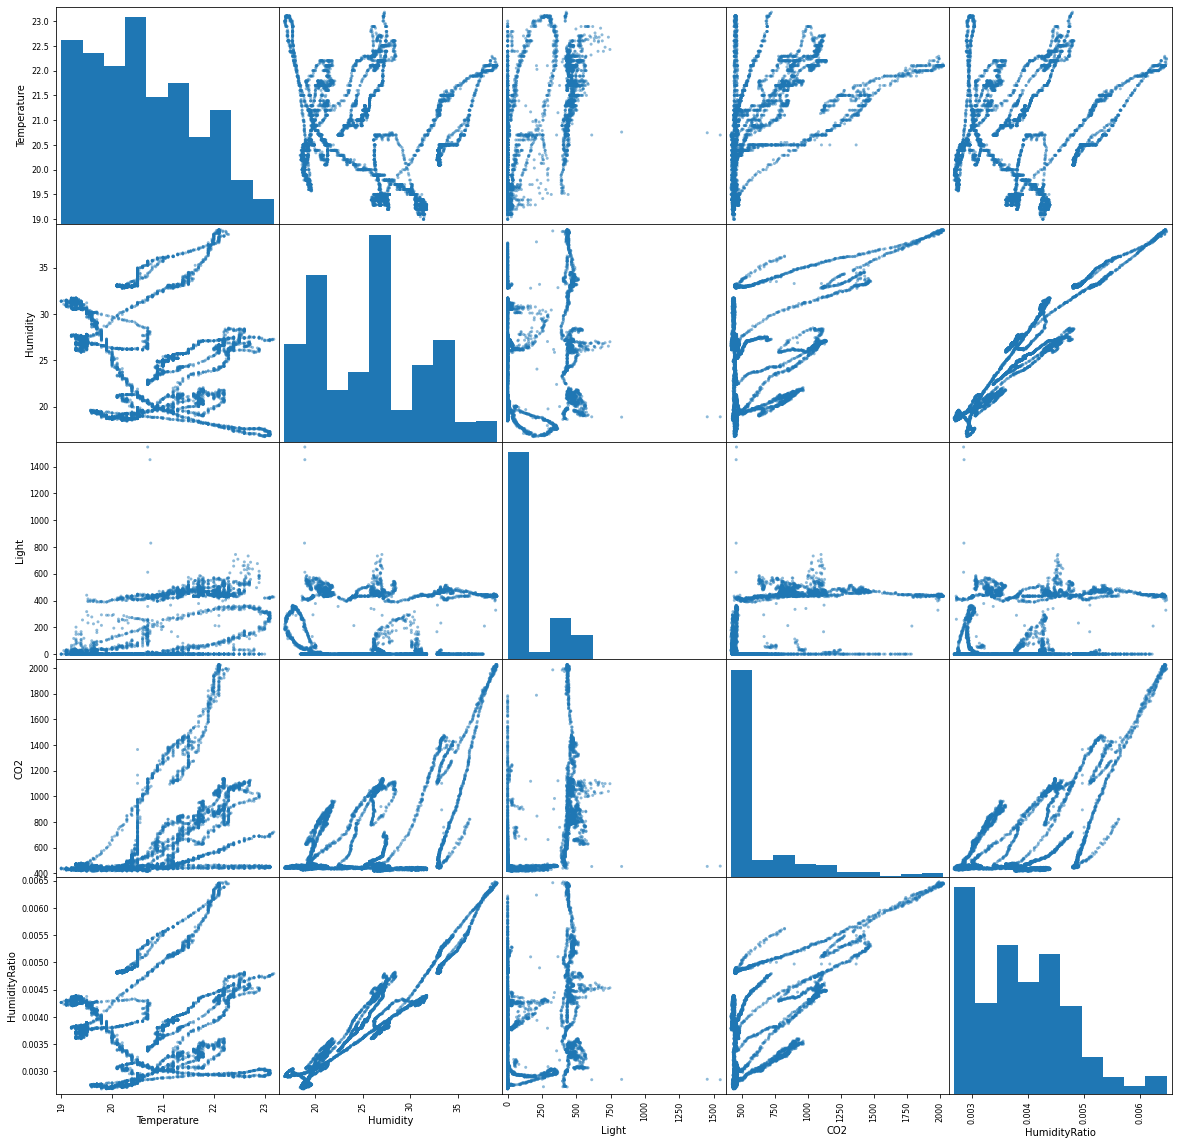

In [87]:
from pandas.plotting import scatter_matrix

num_features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

scatter_matrix(train[num_features], figsize = (20, 20))

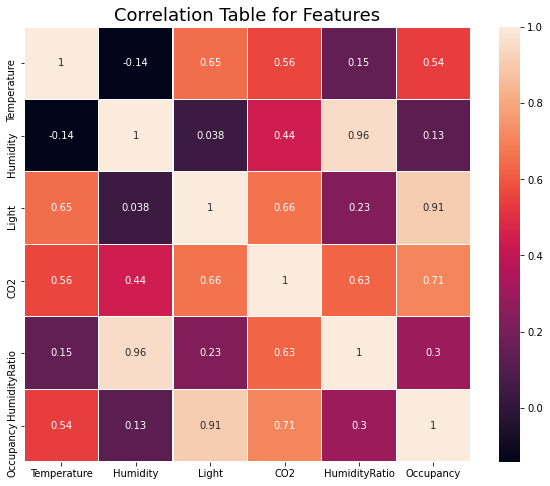

In [90]:
import seaborn as sns

plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(train.corr(), annot=True, linewidths=.2)

In [91]:
a = train['Occupancy'][train['Occupancy'] == 1].count()
b = train['Occupancy'][train['Occupancy'] == 0].count()

print('Count of data points if occupied is '+str(a))
print('Count of data points if not occupied is '+str(b))

Count of data points if occupied is 1729
Count of data points if not occupied is 6414


In [92]:
val['date'] = pd.to_datetime(val['date'])
test['date'] = pd.to_datetime(test['date'])
train['date'] = pd.to_datetime(train['date'])

In [93]:
hours_1 = []
hours_0 = []
for date in train[train['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in train[train['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

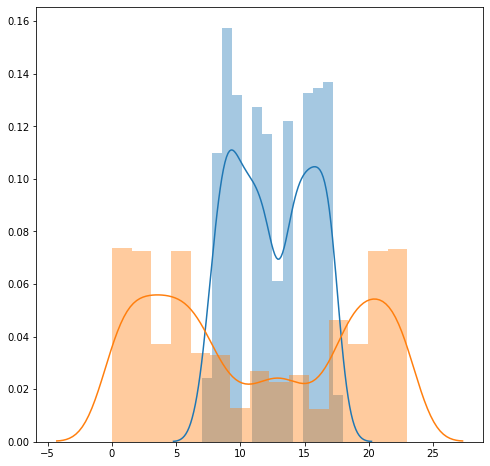

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

In [95]:
test['hour_of_day'] = [1 if (item.hour >= 7 and item.hour <= 17) else 0 for item in test['date']]
val['hour_of_day'] = [1 if (item.hour >= 7 and item.hour <= 17) else 0 for item in val['date']]
train['hour_of_day'] = [1 if (item.hour >= 7 and item.hour <= 17) else 0 for item in train['date']]

In [96]:
train.pop('HumidityRatio')
test.pop('HumidityRatio')
val.pop('HumidityRatio')

0       0.005021
1       0.005009
2       0.005022
3       0.005022
4       0.005030
          ...   
9747    0.004213
9748    0.004230
9749    0.004237
9750    0.004279
9751    0.004321
Name: HumidityRatio, Length: 9752, dtype: float64

In [97]:
train.pop('date')
test.pop('date')
val.pop('date')

0      2015-02-11 14:48:00
1      2015-02-11 14:49:00
2      2015-02-11 14:50:00
3      2015-02-11 14:51:00
4      2015-02-11 14:51:00
               ...        
9747   2015-02-18 09:15:00
9748   2015-02-18 09:16:00
9749   2015-02-18 09:16:00
9750   2015-02-18 09:17:00
9751   2015-02-18 09:19:00
Name: date, Length: 9752, dtype: datetime64[ns]

In [98]:
train.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'hour_of_day'], dtype='object')

In [99]:
test.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'hour_of_day'], dtype='object')

In [100]:
val.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'hour_of_day'], dtype='object')

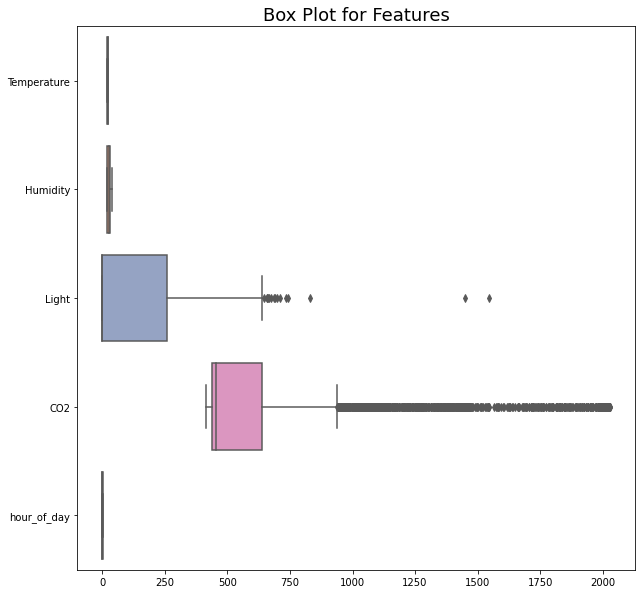

In [105]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data = train.drop(['Occupancy'], axis = 1), orient="h", palette="Set2")

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

x_train = np.array(train.drop(['Occupancy'], axis = 1))
y_train = np.array(train['Occupancy'])

x_val = np.array(val.drop(['Occupancy'], axis = 1))
y_val = np.array(val['Occupancy'])

x_test = np.array(test.drop(['Occupancy'], axis = 1))
y_test = np.array(test['Occupancy'])

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

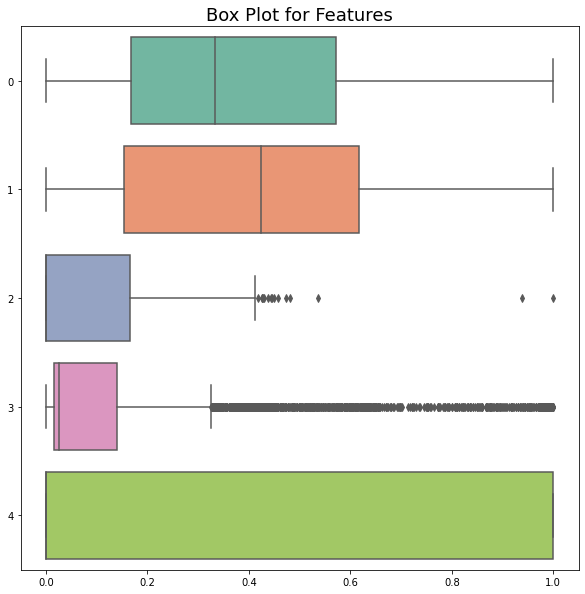

In [108]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data = x_train, orient="h", palette="Set2")

In [110]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
LR_clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
lr_pred = LR_clf.predict(x_val)
print('Logistic Regression performs with a validation accuracy of '+str(accuracy_score(y_val, lr_pred)*100)+'%')

Logistic Regression performs with a validation accuracy of 97.56972928630024%


In [130]:
from sklearn.tree import DecisionTreeClassifier

t_clf = DecisionTreeClassifier()
t_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [131]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

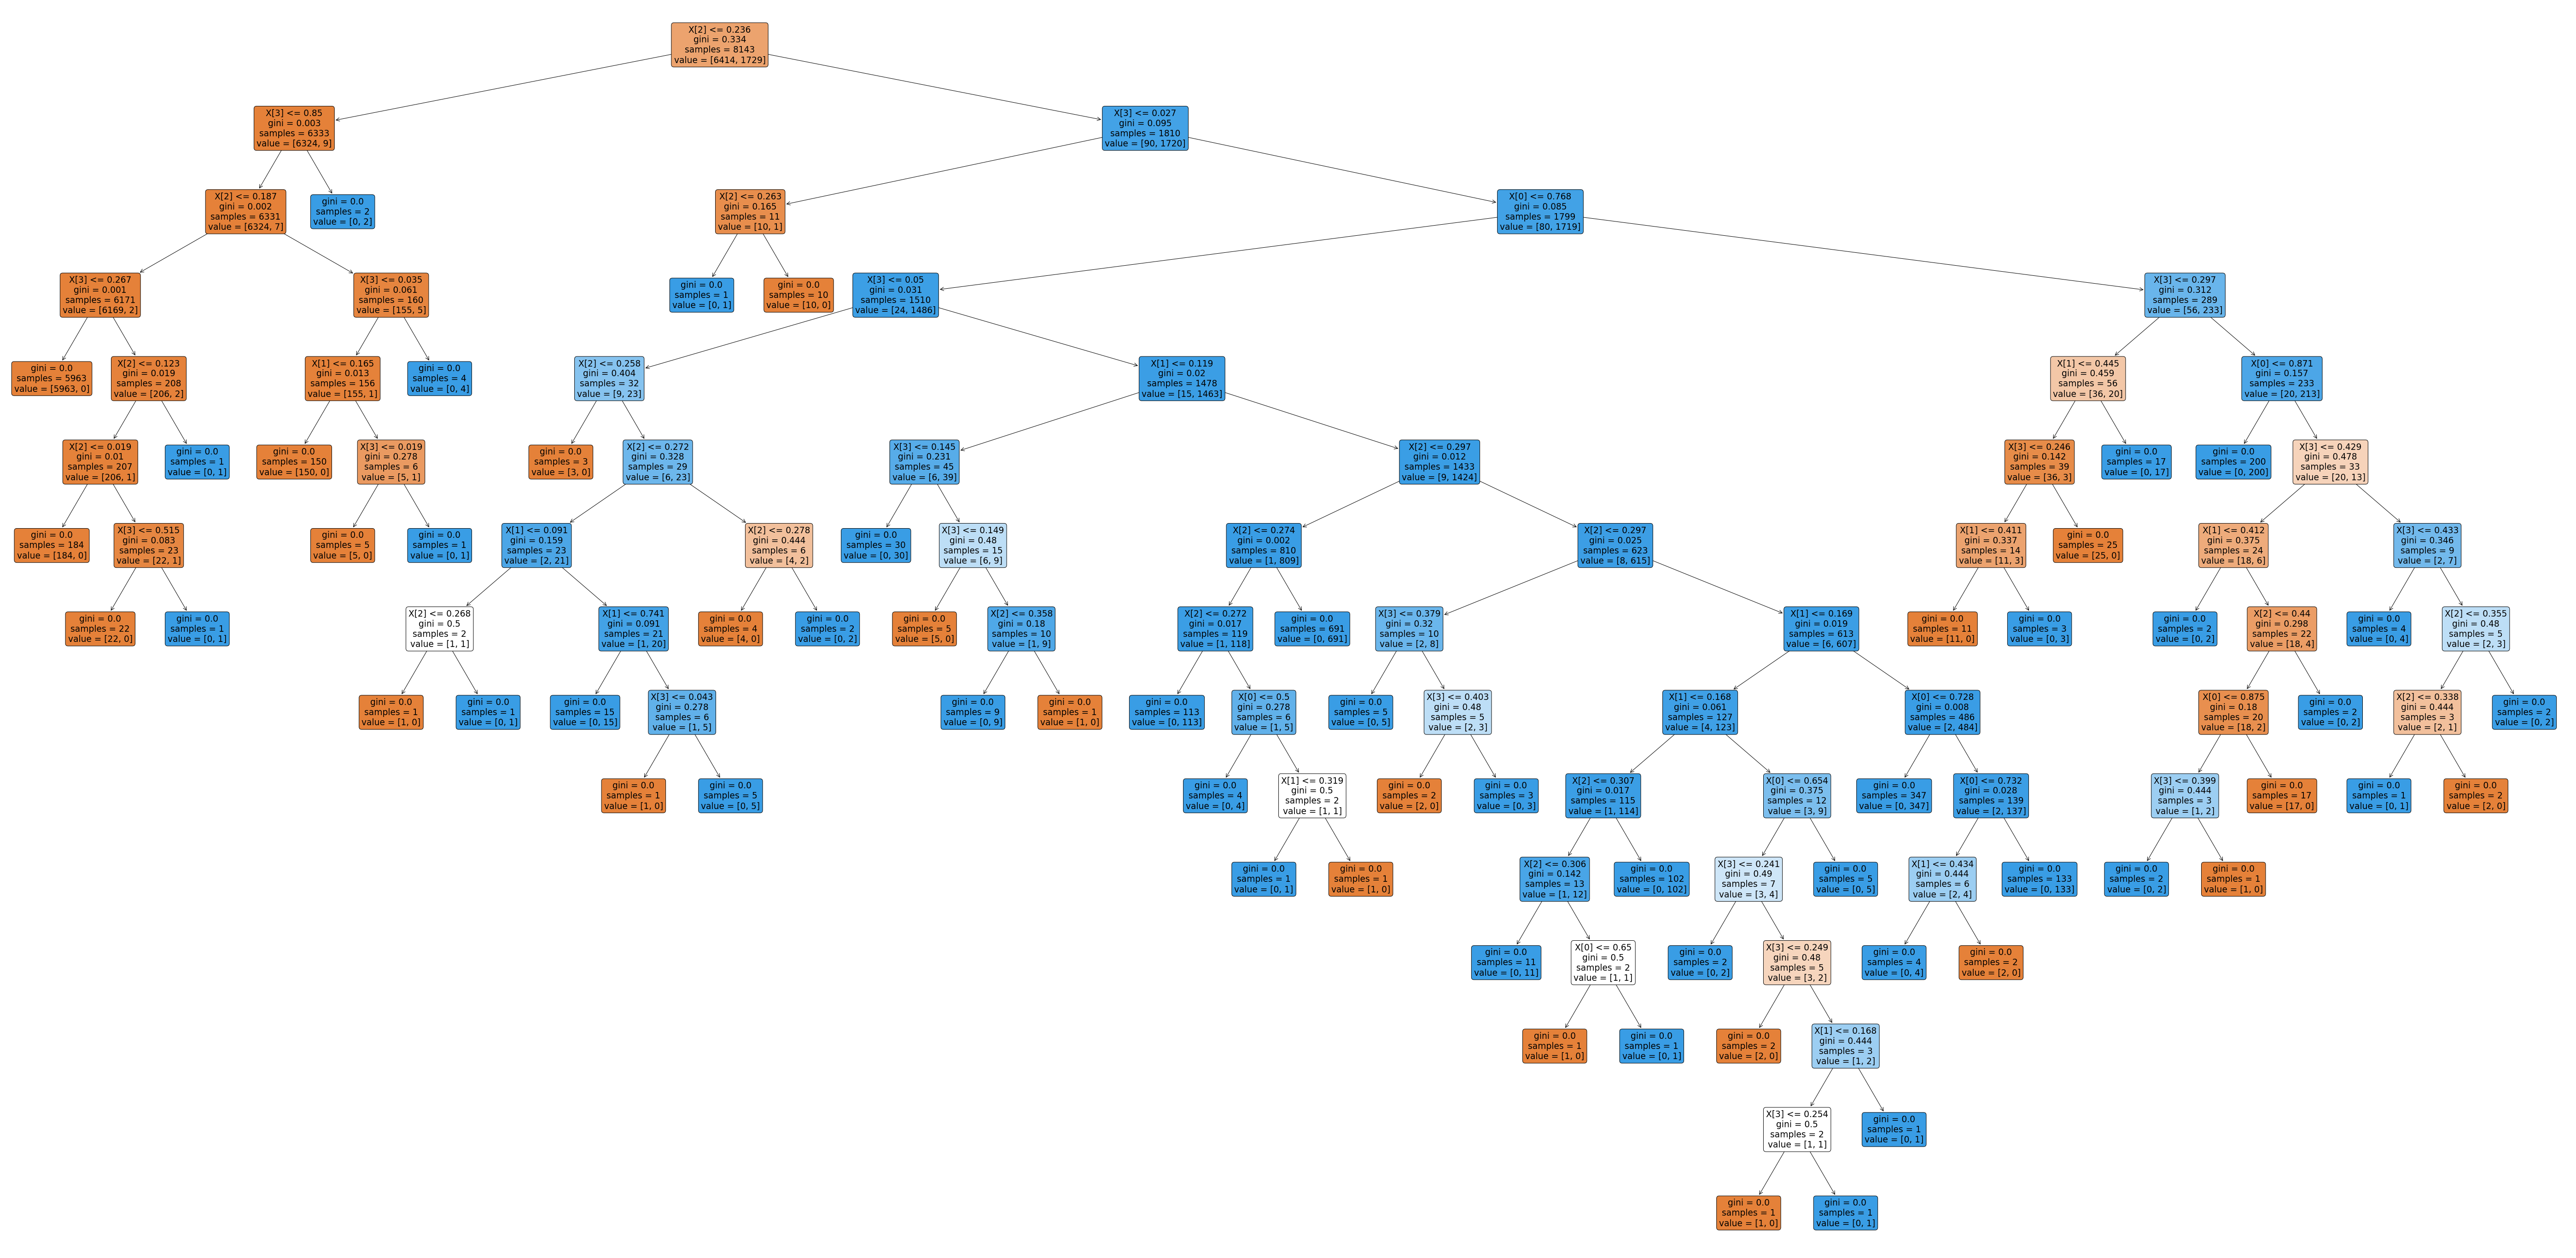

In [132]:
from sklearn import tree
rcParams['figure.figsize'] = 100,50
plot = tree.plot_tree(t_clf, rounded = True, filled = True)

In [150]:
t_pred = t_clf.predict(x_val)
print('Decision Tree performs with a validation accuracy of '+str(accuracy_score(y_val, t_pred)*100)+'%')

Decision Tree performs with a validation accuracy of 95.50861361771943%


In [138]:
from sklearn import svm

sv_clf = svm.SVC()
sv_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
sv_pred = sv_clf.predict(x_val)
print('Support Vector Classifier performs with a validation accuracy of '+str(accuracy_score(y_val, sv_pred)*100)+'%')

Support Vector Classifier performs with a validation accuracy of 98.78999179655456%


In [145]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Dense(32, activation = 'relu', input_dim = 5),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    epochs = 15,
                    verbose = 1)

Epoch 1/15
255/255 [==============================] - 1s 3ms/step - loss: 0.2177 - accuracy: 0.9240 - val_loss: 0.1175 - val_accuracy: 0.9604
Epoch 2/15
255/255 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9775 - val_loss: 0.0713 - val_accuracy: 0.9861
Epoch 3/15
255/255 [==============================] - 1s 2ms/step - loss: 0.0615 - accuracy: 0.9817 - val_loss: 0.0603 - val_accuracy: 0.9873
Epoch 4/15
255/255 [==============================] - 1s 2ms/step - loss: 0.0550 - accuracy: 0.9834 - val_loss: 0.0610 - val_accuracy: 0.9846
Epoch 5/15
255/255 [==============================] - 1s 2ms/step - loss: 0.0495 - accuracy: 0.9860 - val_loss: 0.0595 - val_accuracy: 0.9842
Epoch 6/15
255/255 [==============================] - 1s 2ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0481 - val_accuracy: 0.9881
Epoch 7/15
255/255 [==============================] - 1s 2ms/step - loss: 0.0453 - accuracy: 0.9870 - val_loss: 0.0526 - val_accuracy: 0.9888
Epoch 

In [156]:
print('Neural Network Classifier performs with a validation accuracy of '+str(history.history['val_accuracy'][-1]*100)+'%')

Neural Network Classifier performs with a validation accuracy of 98.9848256111145%


In [160]:
sv_pred_test = sv_clf.predict(x_test)
print('Support Vector Classifier performs with a test accuracy of '+str(accuracy_score(y_test, sv_pred_test)*100)+'%')

Support Vector Classifier performs with a test accuracy of 97.07317073170731%


In [158]:
nn_pred = model.predict(x_test)
print('Neural Network Classifier performs with a test accuracy of '+str(accuracy_score(y_test, nn_pred.round())*100)+'%')

Neural Network Classifier performs with a test accuracy of 97.82363977485929%
